In [15]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import csv
import matplotlib.ticker as mtick
import datetime
from wordcloud import WordCloud, STOPWORDS

In [16]:
df = pd.read_csv("covid_submissions.csv", dtype={'author_created_utc': 'str', 'retrieved_on': 'str'})


#The file is imported. This alerts me to some columns that have mixed data types. We'll do our best to 
#clean this data up, but I'm not using any of these flagged columns.

/var/folders/2z/z3kg4msd25n_41p2vbwjskxr0000gn/T/ipykernel_84186/3077780626.py:1: DtypeWarning: Columns (20,21,38,70,82,86,87,93,95,98) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("covid_submissions.csv", dtype={'author_created_utc': 'str', 'retrieved_on': 'str'})


In [17]:
columns_for_analysis = ['author', 'author_fullname', 'created_utc',
       'id', 'link_flair_text','num_comments', 'quarantine',
       'removed_by_category', 'score', 'selftext', 'stickied',
       'subreddit_subscribers', 'title', 'upvote_ratio', 'url']
df = df[columns_for_analysis]

In [18]:
# Find the columns w/ nans
'''
for column in df.columns:
    if df[column].isnull().values.any():
        print(column)

returns =>

nan_columns = [
'author_flair_type',
'category',
'',
'',
'',
'banned_by',
'removed_by',
'view_count',
]
nan_df = df[nan_columns]
nan_df.dtypes


author_fullname         object
link_flair_text         object
removed_by_category     object
selftext                object
url                     object
'''


"\nfor column in df.columns:\n    if df[column].isnull().values.any():\n        print(column)\n\nreturns =>\n\nnan_columns = [\n'author_flair_type',\n'category',\n'',\n'',\n'',\n'banned_by',\n'removed_by',\n'view_count',\n]\nnan_df = df[nan_columns]\nnan_df.dtypes\n\n\nauthor_fullname         object\nlink_flair_text         object\nremoved_by_category     object\nselftext                object\nurl                     object\n"

In [19]:
#show me all 101 columns
pd.set_option('display.max_columns', None) 

#Takes all NaN and None 
# df = df.replace({np.nan: None}) THIS IS THE SAME AS USING INPLACE=TRUE
df.replace({np.nan: None}, inplace=True)



#Convert the date column to a datetime data type
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

#Set the date column as the DataFrame's index
df.set_index('created_utc', inplace=True)


df.head()

,author,author_fullname,id,link_flair_text,num_comments,quarantine,removed_by_category,score,selftext,stickied,subreddit_subscribers,title,upvote_ratio,url
created_utc,,,,,,,,,,,,,,
2020-11-24 23:59:07,rolacl,t2_78vawltu,k0gw81,None,14,False,author,1,[removed],False,26691,r/CovidVaccinated Lounge,1.0,https://www.reddit.com/r/CovidVaccinated/comme...
2020-11-25 00:07:14,rolacl,t2_78vawltu,k0h19d,None,7,False,None,2,Are you gonna get vaccinated ?\n\n[View Poll](...,False,26691,Are you gonna get the Covid vaccine ?,1.0,https://www.reddit.com/r/CovidVaccinated/comme...
2020-11-25 00:08:40,rolacl,t2_78vawltu,k0h22o,None,2,False,None,0,\n\n[View Poll](https://www.reddit.com/poll/k0...,False,26691,What vaccines will you trust the most ?,0.5,https://www.reddit.com/r/CovidVaccinated/comme...
2020-11-25 00:50:13,tukekairo,t2_g8rc9,k0hqx8,None,11,False,None,3,I will throw this out there...having tested po...,False,26692,Covid positive pre vaccine...,1.0,https://www.reddit.com/r/CovidVaccinated/comme...
2020-11-25 00:55:15,[deleted],None,k0htw7,None,0,False,deleted,1,[deleted],False,26692,When do you think a vaccine will be available ...,1.0,https://www.reddit.com/r/CovidVaccinated/comme...


### Descriptive Stats

##### Number of Posts per Day

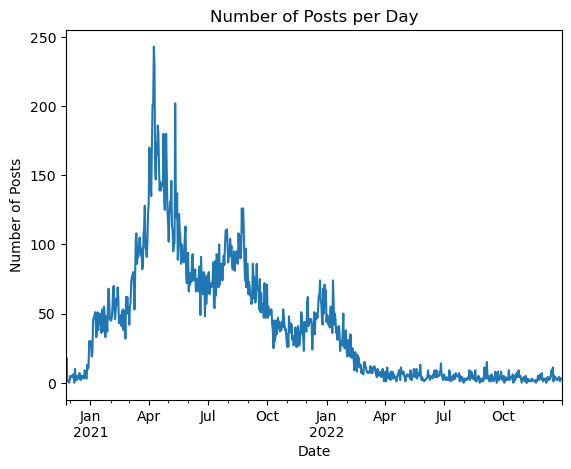

In [20]:
daily_posts = df.resample('D').size()
daily_posts.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Number of Posts per Day')
plt.show()

##### Number of Subscribers

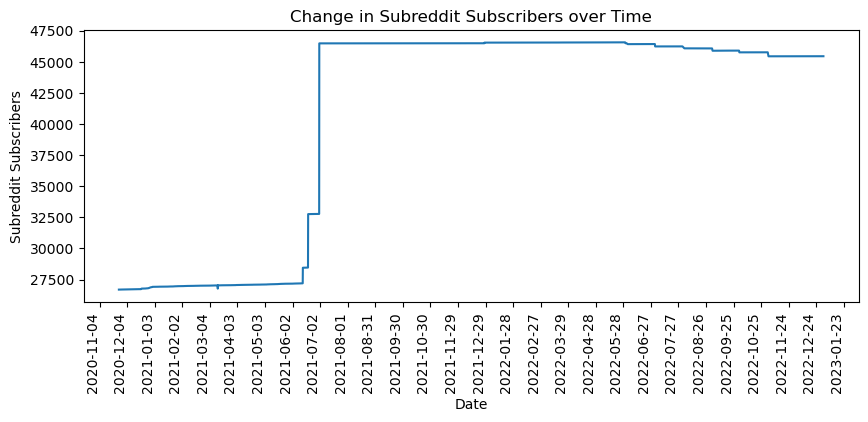

In [30]:
# Plot the change in 'subreddit_subscribers' over time
plt.figure(figsize=(10, 4))

# Use pandas plot function with interpolation
df['subreddit_subscribers'].plot(kind='line')

# Set x-axis label, y-axis label, and title
plt.xlabel('Date')
plt.ylabel('Subreddit Subscribers')
plt.title('Change in Subreddit Subscribers over Time')

# Adjust x-axis tick frequency
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=30))  # Binning

plt.show()


##### Top 20 Post Submitters

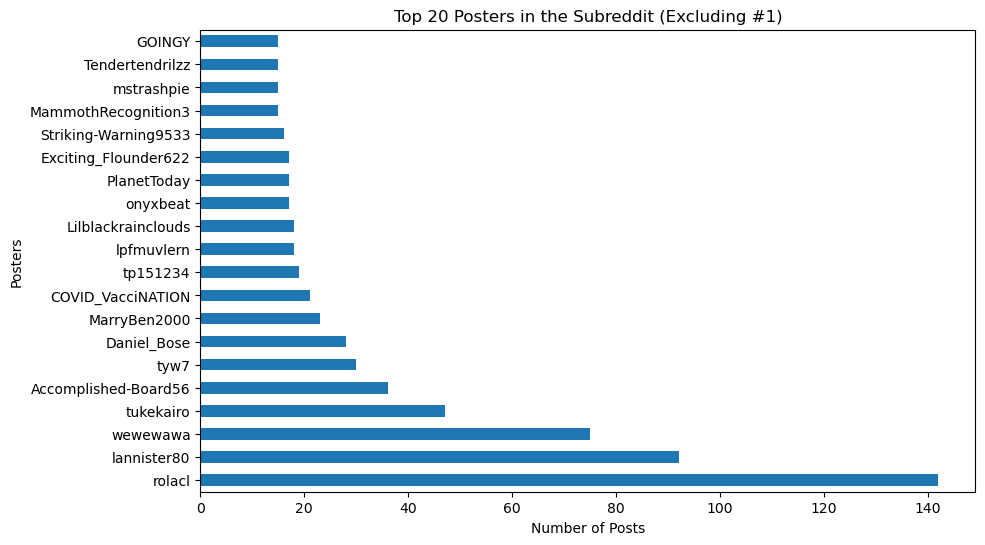

In [32]:
# Get the top submitters excluding the first one because it is the bucket of all deleted posts
top_submitters = df['author'].value_counts().head(21)[1:]

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
top_submitters.plot(kind='barh')
plt.xlabel('Number of Posts')
plt.ylabel('Posters')
plt.title('Top 20 Posters in the Subreddit (Excluding #1)')
plt.show()


##### Top Submitters, Including 'Deleted' as Post Author

In [9]:
# Get the top submitters
deleted_top_submit = df['author'].value_counts().head(5)
print(deleted_top_submit)

[deleted]      9103
rolacl          142
lannister80      92
wewewawa         75
tukekairo        47
Name: author, dtype: int64


##### Understanding Content Types via Link Flair Text

In [10]:
link_flair_text = df["link_flair_text"].value_counts()
print(link_flair_text)

Question                          9911
Pfizer                            5192
Moderna                           2371
Side Effects                      2057
J&amp;J                           1577
General Info                      1296
Good Experience                   1169
News                              1121
Got the Second Dose                702
AstraZeneca                        403
Pfizer Booster                     387
Moderna Booster                    270
AstraZenaca                        170
I’m in a vaccine trial             147
I’ve been vaccinated !              95
Covaxin                             63
Good News                           59
Sinovac                             43
Sinopharm                           36
Gamaleya Sputnik V                  30
J&amp;J Booster                     29
Vaccination Update                  20
Special Post                         5
Vaccine Trials                       2
Question To Trial Participants       1
MISLEADING TITLE         

##### Average number of Comments per post per day

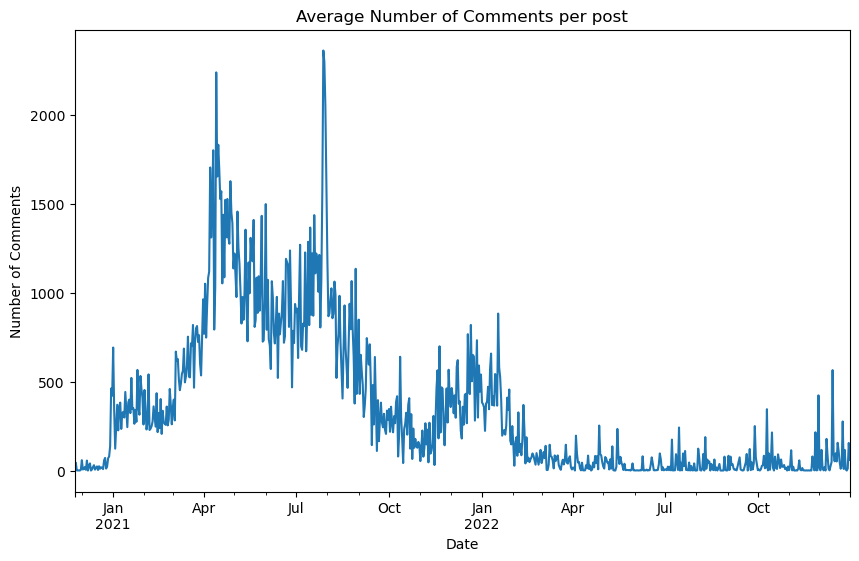

In [11]:
daily_num_comments = df['num_comments'].resample('D').sum() #sum of comments per day
average_comments_per_day = daily_num_comments.mean() #average it

plt.figure(figsize=(10, 6)) 
daily_num_comments.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Average Number of Comments per post')
plt.show()

##### Average Post Score for each Link Flair Text category

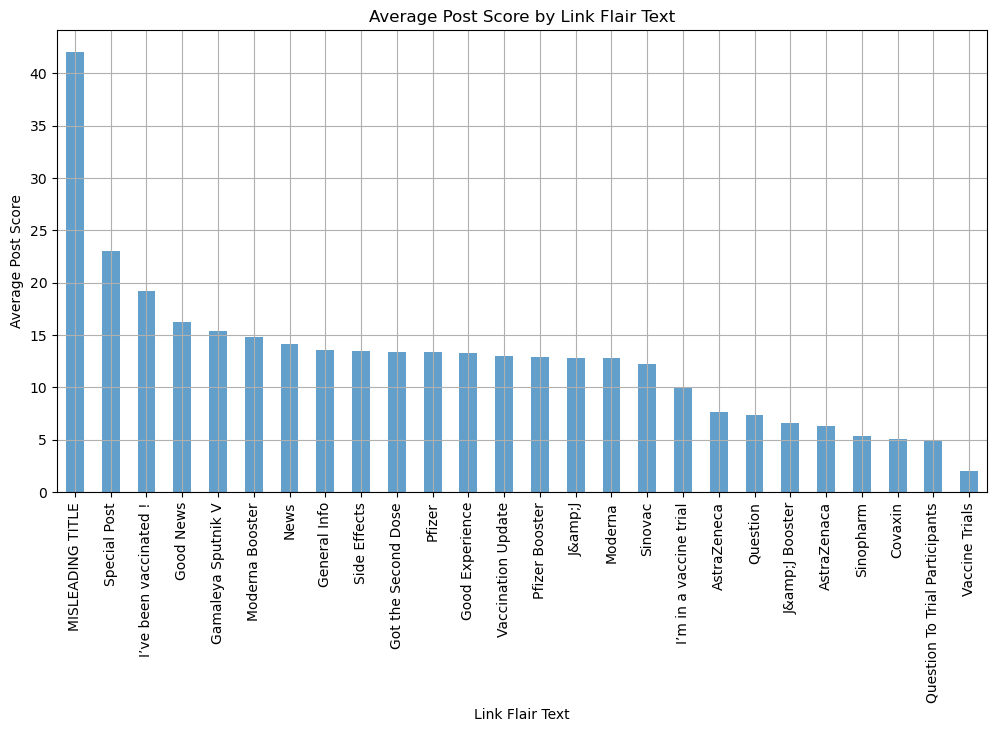

In [97]:
# Calculate the average post_score for each link_text_flair category
average_score_by_flair = df.groupby('link_flair_text')['score'].mean()

#SORT
average_score_by_flair = average_score_by_flair.sort_values(ascending=False)

#PLOT
plt.figure(figsize=(12, 6))
average_score_by_flair.plot(kind='bar', alpha=0.7)
plt.xlabel('Link Flair Text')
plt.ylabel('Average Post Score')
plt.title('Average Post Score by Link Flair Text')
plt.grid(True)
plt.show()


### Moderation Goings-On

##### Deleted Posts by User over time

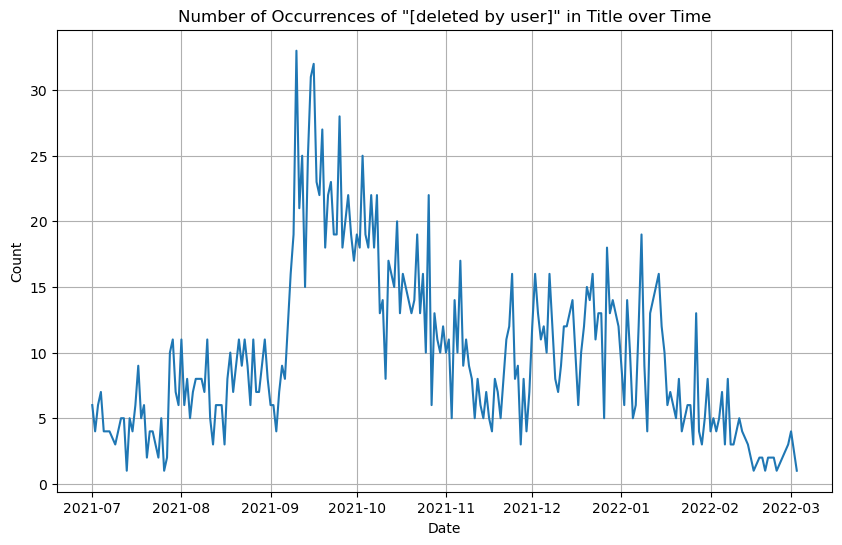

In [79]:
# Convert the index to datetime if it's not already in datetime format
df.index = pd.to_datetime(df.index)

# Filter the data to include only rows where the title contains '[deleted by user]'
deleted_by_user_data = df[df['title'].str.contains(r'\[deleted by user\]', na=False)]

# Group the data by date and count the occurrences
deleted_by_user_count = deleted_by_user_data.groupby(deleted_by_user_data.index.date).size()

# Plot the count over time
plt.figure(figsize=(10, 6))
plt.plot(deleted_by_user_count.index, deleted_by_user_count.values)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of Occurrences of "[deleted by user]" in Title over Time')
plt.grid(True)
plt.show()

##### Removed Posts by Category

In [157]:
removed_by_category = df[df['removed_by_category'].notnull()]['removed_by_category'].value_counts()
print(removed_by_category)

# https://www.reddit.com/r/redditdev/comments/kypjmk/check_if_submission_has_been_removed_by_a_mod/

deleted             6178
moderator           5737
reddit              1457
author                 2
content_takedown       1
Name: removed_by_category, dtype: int64


##### Removed posts over time

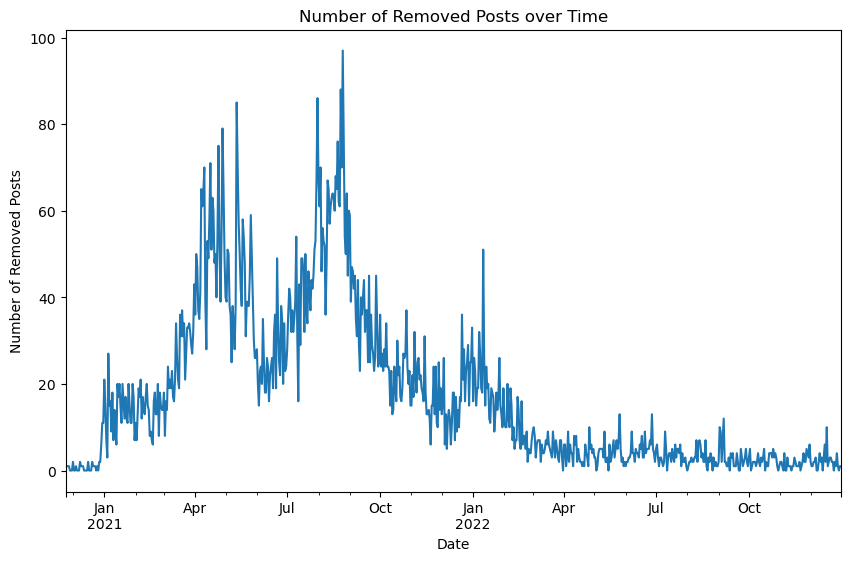

In [158]:
#removed posts dataframe
removed_posts = df[df['removed_by_category'].notnull()]

#daily sample
daily_removed_posts = removed_posts.resample('D').size()

#Removed posts over time
plt.figure(figsize=(10, 6))
daily_removed_posts.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Removed Posts')
plt.title('Number of Removed Posts over Time')
plt.show()

##### Moderator-removed posts over time
*These are posts that were forcibly removed by moderators

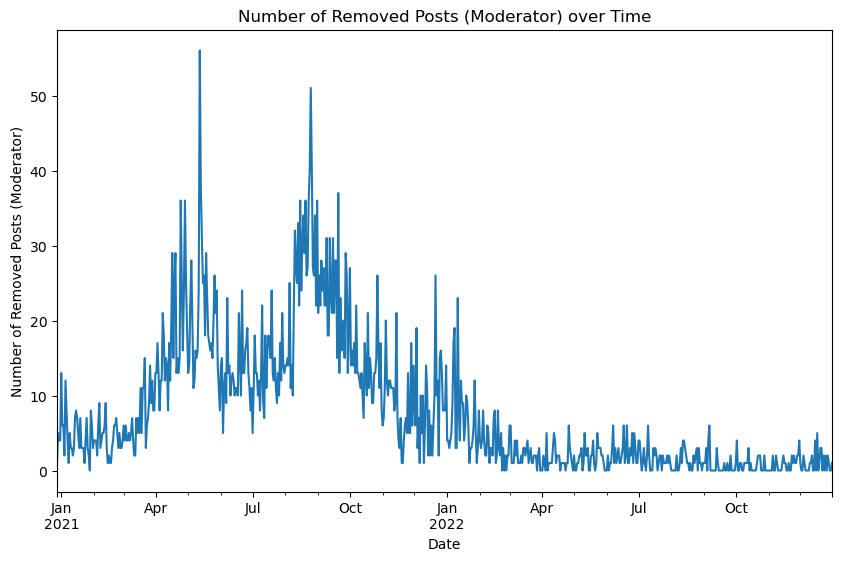

In [159]:
# Filter the DataFrame to include only the removed posts in the "moderator" category
removed_moderator = df[df['removed_by_category'] == 'moderator']

# Resample the data to calculate the count of removed posts in the "moderator" category per day
daily_removed_moderator = removed_moderator.resample('D').size()

# Plot the number of removed posts in the "moderator" category over time
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
daily_removed_moderator.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Removed Posts (Moderator)')
plt.title('Number of Removed Posts (Moderator) over Time')
plt.show()

##### Ratio of Removed Posts to Posts

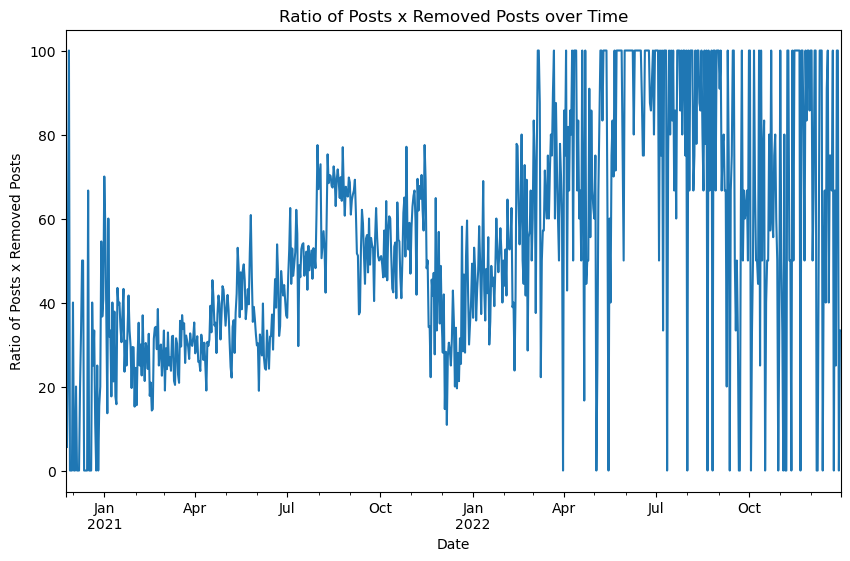

In [213]:
daily_posts = df.resample('D').size()

# Get all counts of removed posts only on days where posts were removed
daily_removed_posts = df[df['removed_by_category'].notnull()].resample('D').size()
daily_removed_posts = daily_removed_posts.iloc[daily_removed_posts.to_numpy().nonzero()[0]]
daily_removed_posts

# Get the ratios
daily_removed_posts.index
daily_posts = daily_posts[daily_removed_posts.index]

df_ratio = pd.concat([daily_posts, daily_removed_posts], axis=1)
df_ratio.columns = ['post_count', 'removed_count']

# Reindex to provide 0s in the dates that we removed
df_ratio['ratio'] = (df_ratio['removed_count'] / df_ratio['post_count']) * 100
date_index = pd.date_range(df_ratio.index.min(), df_ratio.index.max())

df_ratio = df_ratio.reindex(date_index, fill_value=0)

# make her pretty
plt.figure(figsize=(10, 6))
df_ratio['ratio'].plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Ratio of Posts x Removed Posts')
plt.title('Ratio of Posts x Removed Posts over Time')
plt.show()

##### Post Frequency plotted against Moderator Decisions

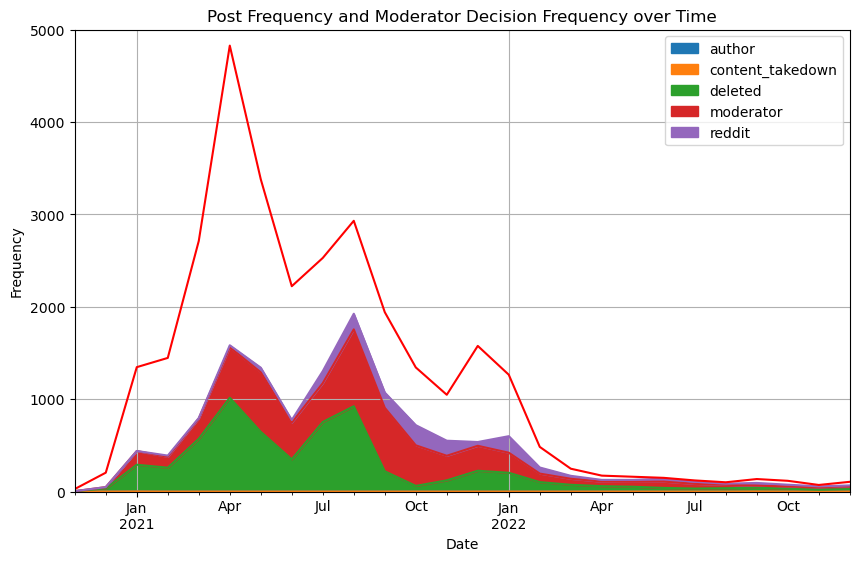

In [47]:
# Group the data by post frequency over time
post_frequency = df.resample('M').size()

# Group the data by moderator decision frequency over time
moderator_decisions = df.groupby([pd.Grouper(freq='M'), 'removed_by_category']).size().unstack(fill_value=0)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the moderator decision frequency over time as stacked area plot
moderator_decisions.plot.area(ax=ax, stacked=True)

# Plot the post frequency over time as a line plot
post_frequency.plot(ax=ax, color='red')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Post Frequency and Moderator Decision Frequency over Time')

# Show the legend
plt.legend()

# Set the y-axis limit
plt.ylim(0, 5000)

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

### Sentiment-like Signals

##### Average Post Scores over time

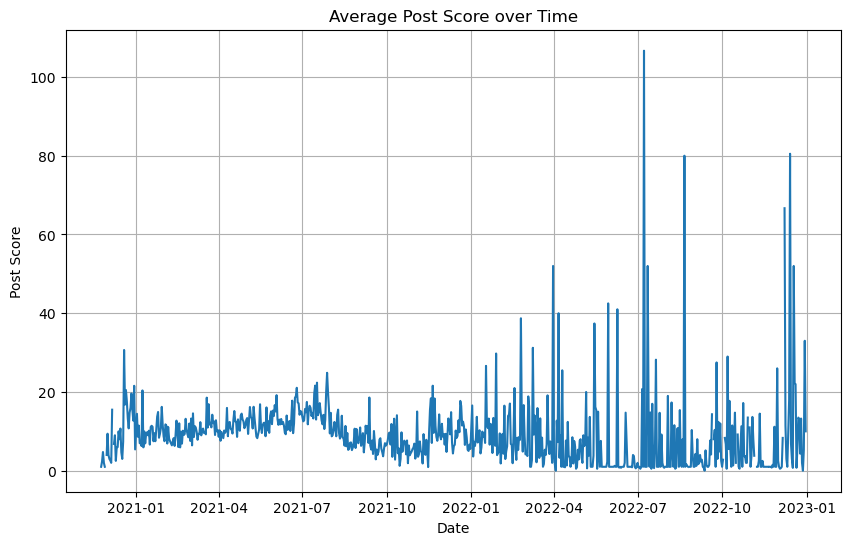

In [28]:
# Resample the DataFrame by day and calculate the average comment score
average_post_score = df['score'].resample('D').mean()

# Plot the average comment score over time
plt.figure(figsize=(10, 6))
plt.plot(average_post_score.index, average_post_score.values)
plt.xlabel('Date')
plt.ylabel('Post Score')
plt.title('Average Post Score over Time')
plt.grid(True)
plt.show()

##### Average Upvote Ratios over Time

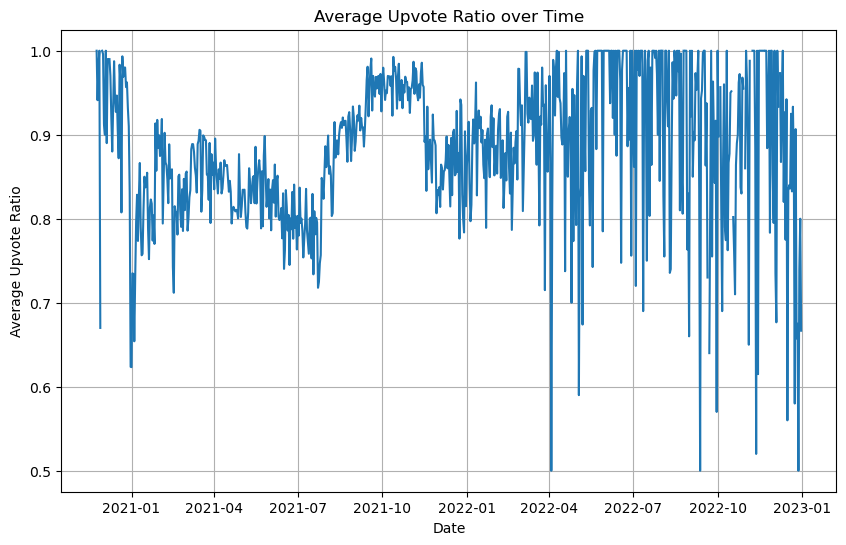

In [30]:
# Resample the DataFrame by day and calculate the average upvote ratio
average_upvote_ratio = df['upvote_ratio'].resample('D').mean()

# Plot the average upvote ratio over time
plt.figure(figsize=(10, 6))
plt.plot(average_upvote_ratio.index, average_upvote_ratio.values)
plt.xlabel('Date')
plt.ylabel('Average Upvote Ratio')
plt.title('Average Upvote Ratio over Time')
plt.grid(True)
plt.show()

### Title and Body (Self-Text) Content

##### Post Titles that mention "mods"

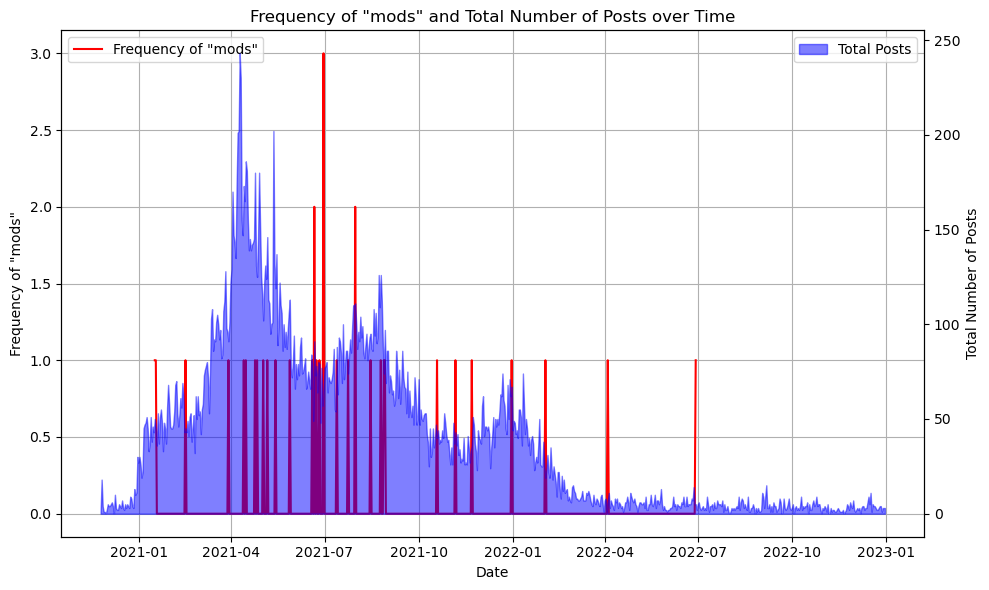

In [61]:
# Filter the data for titles containing the phrase "the mods"
filtered_data_mods = df[df['title'].str.contains('mods', case=False)]

# Group the filtered data by month and count the occurrences
phrase_frequency = filtered_data_mods.resample('D').size()

# Group the total data by month and count the posts
total_posts = df.resample('D').size()

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the frequency of the phrase "the mods" as a line plot
ax1.plot(phrase_frequency.index, phrase_frequency.values, color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Frequency of "mods"')

# Create a twin axis sharing the x-axis
ax2 = ax1.twinx()

# Plot the area plot for the total number of posts
ax2.fill_between(total_posts.index, 0, total_posts.values, color='blue', alpha=0.5)
ax2.set_ylabel('Total Number of Posts')

# Set labels and title
plt.title('Frequency of "mods" and Total Number of Posts over Time')

# Show the legend
ax1.legend(['Frequency of "mods"'], loc='upper left')
ax2.legend(['Total Posts'], loc='upper right')

# Show the grid
ax1.grid(True)

# Adjust the plot layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

##### Post Titles mentioning "the jab" 
Note: this is generally a derogatory term for the vaccine, but only from an American point of view. 
"Shots" or vaccines are very typically described as "jabs" elsewhere in the world such as the UK
and Australia. 
https://www.wsj.com/articles/jab-a-british-term-for-a-covid-19-shot-but-born-in-the-u-s-a-11617898298

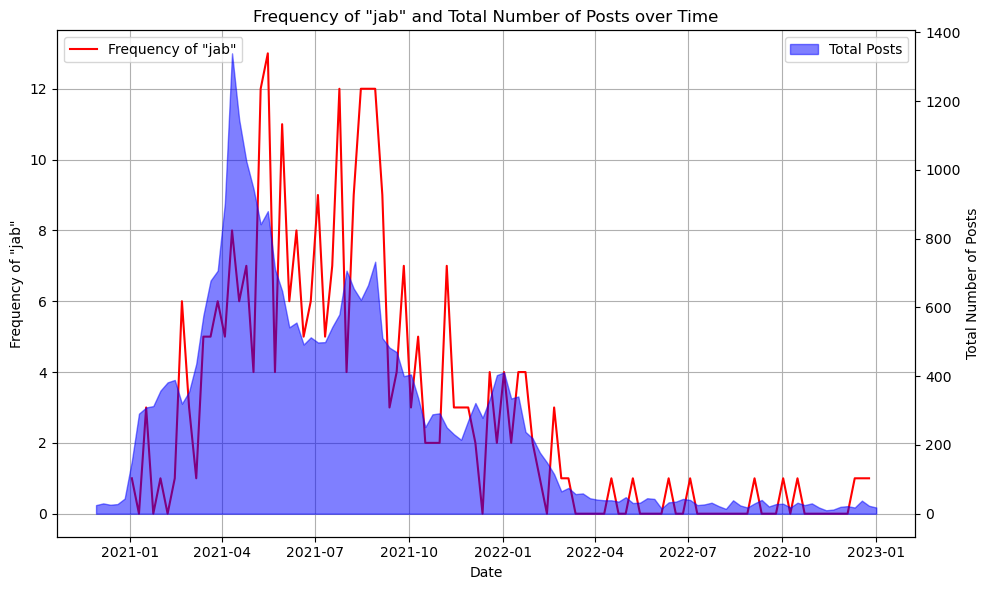

In [63]:
# Filter the data for titles containing the phrase "the mods"
filtered_data_jab = df[df['title'].str.contains('jab', case=False)]

# Group the filtered data by month and count the occurrences
phrase_frequency = filtered_data_jab.resample('W').size()

# Group the total data by month and count the posts
total_posts = df.resample('W').size()

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the frequency of the phrase "jab" as a line plot
ax1.plot(phrase_frequency.index, phrase_frequency.values, color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Frequency of "jab"')

# Create a twin axis sharing the x-axis
ax2 = ax1.twinx()

# Plot the area plot for the total number of posts
ax2.fill_between(total_posts.index, 0, total_posts.values, color='blue', alpha=0.5)
ax2.set_ylabel('Total Number of Posts')

# Set labels and title
plt.title('Frequency of "jab" and Total Number of Posts over Time')

# Show the legend
ax1.legend(['Frequency of "jab"'], loc='upper left')
ax2.legend(['Total Posts'], loc='upper right')

# Show the grid
ax1.grid(True)

# Adjust the plot layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

##### Post Titles mentioning "exemption"

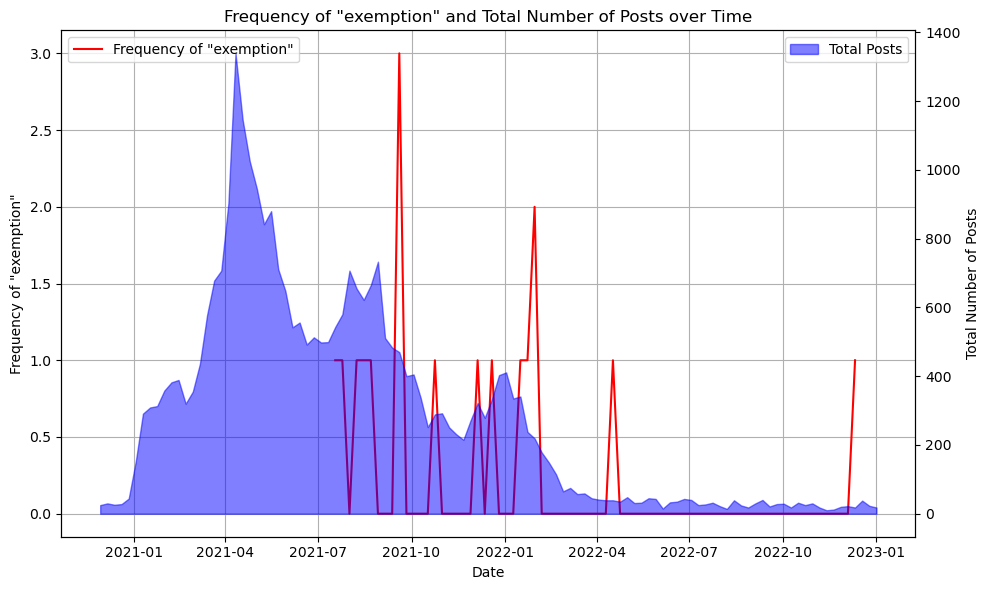

In [64]:
# Filter the data for titles containing the phrase "the mods"
filtered_data_exemption = df[df['title'].str.contains('exemption', case=False)]

# Group the filtered data by month and count the occurrences
phrase_frequency = filtered_data_exemption.resample('W').size()

# Group the total data by month and count the posts
total_posts = df.resample('W').size()

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the frequency of the phrase "exemption" as a line plot
ax1.plot(phrase_frequency.index, phrase_frequency.values, color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Frequency of "exemption"')

# Create a twin axis sharing the x-axis
ax2 = ax1.twinx()

# Plot the area plot for the total number of posts
ax2.fill_between(total_posts.index, 0, total_posts.values, color='blue', alpha=0.5)
ax2.set_ylabel('Total Number of Posts')

# Set labels and title
plt.title('Frequency of "exemption" and Total Number of Posts over Time')

# Show the legend
ax1.legend(['Frequency of "exemption"'], loc='upper left')
ax2.legend(['Total Posts'], loc='upper right')

# Show the grid
ax1.grid(True)

# Adjust the plot layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

##### Post Titles mentioning "side effects"

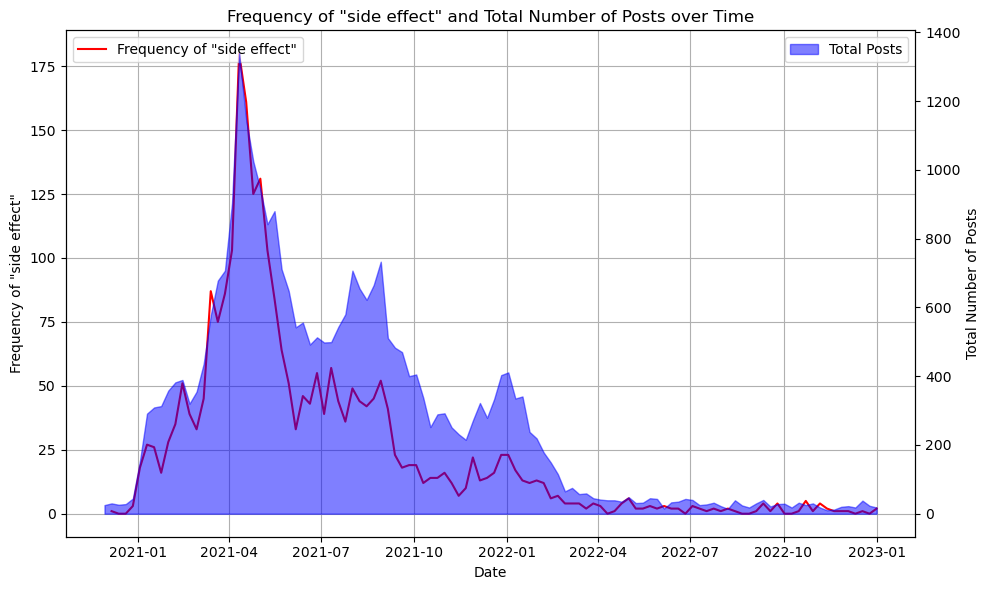

In [65]:
# Filter the data for titles containing the phrase "side effect"
filtered_data_SE = df[df['title'].str.contains('side effect', case=False)]

# Group the filtered data by month and count the occurrences
phrase_frequency = filtered_data_SE.resample('W').size()

# Group the total data by month and count the posts
total_posts = df.resample('W').size()

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the frequency of the phrase "side effect" as a line plot
ax1.plot(phrase_frequency.index, phrase_frequency.values, color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Frequency of "side effect"')

# Create a twin axis sharing the x-axis
ax2 = ax1.twinx()

# Plot the area plot for the total number of posts
ax2.fill_between(total_posts.index, 0, total_posts.values, color='blue', alpha=0.5)
ax2.set_ylabel('Total Number of Posts')

# Set labels and title
plt.title('Frequency of "side effect" and Total Number of Posts over Time')

# Show the legend
ax1.legend(['Frequency of "side effect"'], loc='upper left')
ax2.legend(['Total Posts'], loc='upper right')

# Show the grid
ax1.grid(True)

# Adjust the plot layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

##### Post Titles mentioning "myocarditis"

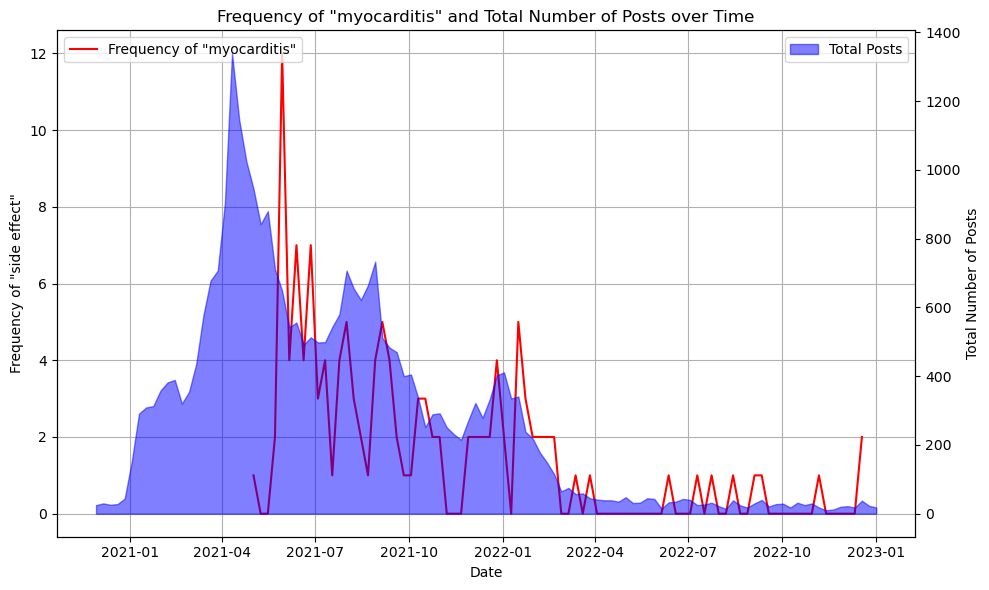

In [72]:
# Filter the data for titles containing the phrase "myocarditis"
filtered_data_M = df[df['title'].str.contains('myocarditis', case=False)]

# Group the filtered data by month and count the occurrences
phrase_frequency = filtered_data_M.resample('W').size()

# Group the total data by month and count the posts
total_posts = df.resample('W').size()

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the frequency of the phrase "myocarditis" as a line plot
ax1.plot(phrase_frequency.index, phrase_frequency.values, color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Frequency of "side effect"')

# Create a twin axis sharing the x-axis
ax2 = ax1.twinx()

# Plot the area plot for the total number of posts
ax2.fill_between(total_posts.index, 0, total_posts.values, color='blue', alpha=0.5)
ax2.set_ylabel('Total Number of Posts')

# Set labels and title
plt.title('Frequency of "myocarditis" and Total Number of Posts over Time')

# Show the legend
ax1.legend(['Frequency of "myocarditis"'], loc='upper left')
ax2.legend(['Total Posts'], loc='upper right')

# Show the grid
ax1.grid(True)

# Adjust the plot layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

##### Post Titles mentioning "mandate" or "mandated"

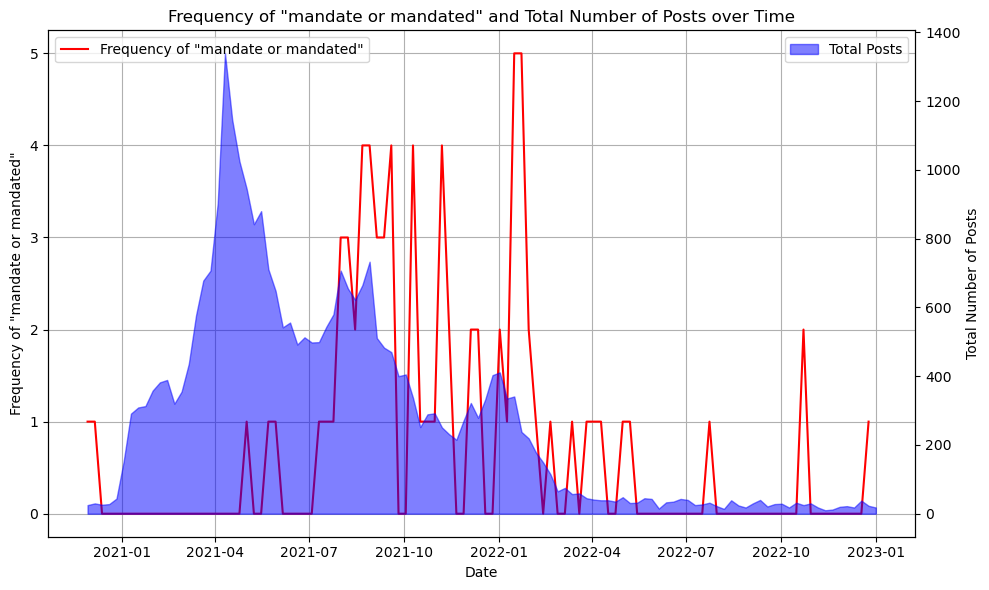

In [73]:
# Filter the data for titles containing the phrase "mandat-"
filtered_data_mand = df[df['title'].str.contains('mandat', case=False)]

# Group the filtered data by month and count the occurrences
phrase_frequency = filtered_data_mand.resample('W').size()

# Group the total data by month and count the posts
total_posts = df.resample('W').size()

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the frequency of the phrase "mandat-" as a line plot
ax1.plot(phrase_frequency.index, phrase_frequency.values, color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Frequency of "mandate or mandated"')

# Create a twin axis sharing the x-axis
ax2 = ax1.twinx()

# Plot the area plot for the total number of posts
ax2.fill_between(total_posts.index, 0, total_posts.values, color='blue', alpha=0.5)
ax2.set_ylabel('Total Number of Posts')

# Set labels and title
plt.title('Frequency of "mandate or mandated" and Total Number of Posts over Time')

# Show the legend
ax1.legend(['Frequency of "mandate or mandated"'], loc='upper left')
ax2.legend(['Total Posts'], loc='upper right')

# Show the grid
ax1.grid(True)

# Adjust the plot layout to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

##### Wordclouds for word frequency at 3 intervals: Q1 2021, Q3 2021, and Q1 2022

/var/folders/2z/z3kg4msd25n_41p2vbwjskxr0000gn/T/ipykernel_83385/2993400373.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_data['clean_title'] = filtered_data['title'].str.replace(r'\[deleted by user\]', '')
/var/folders/2z/z3kg4msd25n_41p2vbwjskxr0000gn/T/ipykernel_83385/2993400373.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['clean_title'] = filtered_data['title'].str.replace(r'\[deleted by user\]', '')


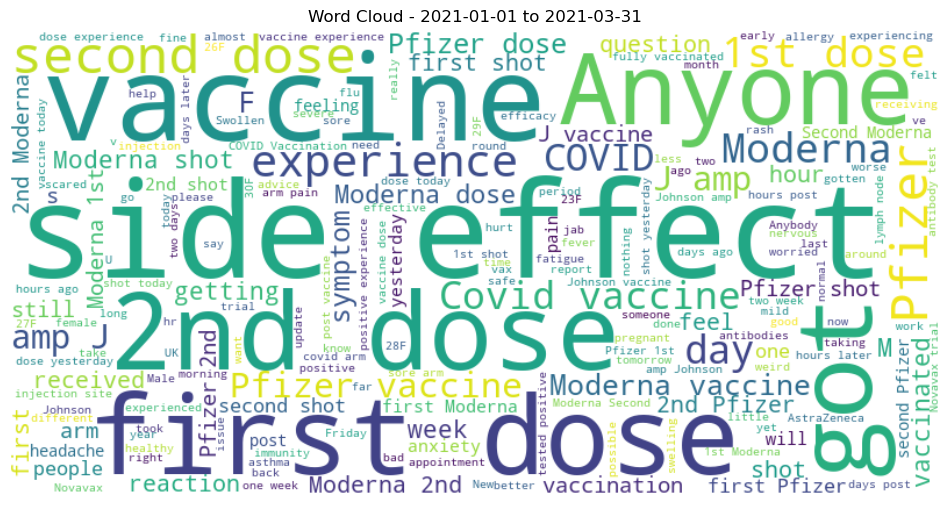

/var/folders/2z/z3kg4msd25n_41p2vbwjskxr0000gn/T/ipykernel_83385/2993400373.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_data['clean_title'] = filtered_data['title'].str.replace(r'\[deleted by user\]', '')
/var/folders/2z/z3kg4msd25n_41p2vbwjskxr0000gn/T/ipykernel_83385/2993400373.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['clean_title'] = filtered_data['title'].str.replace(r'\[deleted by user\]', '')


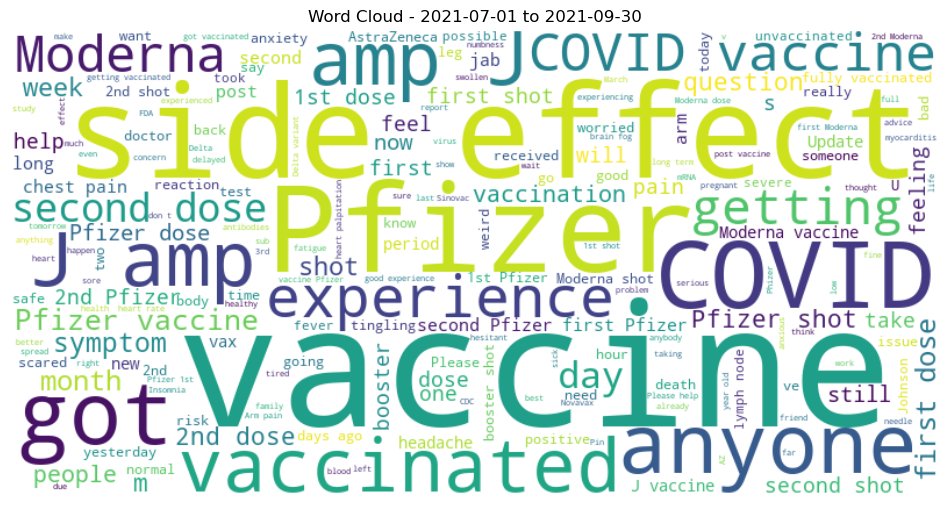

/var/folders/2z/z3kg4msd25n_41p2vbwjskxr0000gn/T/ipykernel_83385/2993400373.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_data['clean_title'] = filtered_data['title'].str.replace(r'\[deleted by user\]', '')
/var/folders/2z/z3kg4msd25n_41p2vbwjskxr0000gn/T/ipykernel_83385/2993400373.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['clean_title'] = filtered_data['title'].str.replace(r'\[deleted by user\]', '')


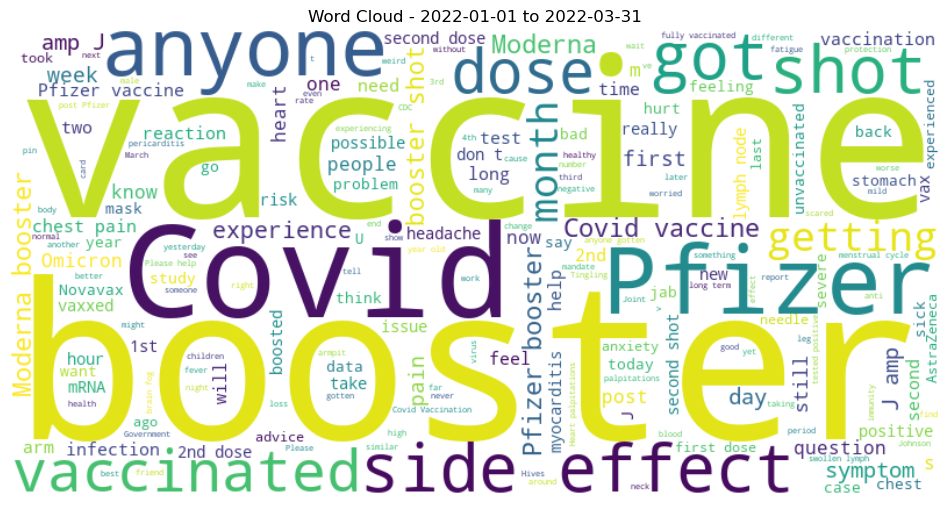

In [90]:
# Define the time intervals
time_intervals = [('2021-01-01', '2021-03-31'), ('2021-07-01', '2021-09-30'), ('2022-01-01', '2022-03-31')]

# Generate word clouds for each time interval
for start_date, end_date in time_intervals:
    # Filter the data within the time interval
    filtered_data = df.loc[start_date:end_date]

    # Preprocess the titles and remove the phrase
    filtered_data['clean_title'] = filtered_data['title'].str.replace(r'\[deleted by user\]', '')

    # Concatenate the cleaned titles within the time interval
    titles = ' '.join(filtered_data['clean_title'])

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)

    # Plot the word cloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud - {} to {}'.format(start_date, end_date))

    # Show the plot
    plt.show()